In [96]:
import numpy as np
import pandas as pd

#Loading the dataset into a dataframe
iris_df = pd.read_csv('./iris.csv')
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [97]:
#a. First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

# Here variety should also be taken as it is the class label
df = pd.DataFrame()
df['sepal.length'] = iris_df['sepal.length']
df['sepal.width'] = iris_df['sepal.width']
df['variety'] = iris_df['variety']
df

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


In [98]:
# test train split without inbuilt functions

#Testing data
test_df = []

#First three samples of each variety are extracted.
for class_label in df['variety'].unique():
    sample = df[df['variety'] == class_label].head(3)
    test_df.append(sample)

# The list is concatenated into a data-frame.
test_df = pd.concat(test_df)
print("Testing data:\n", test_df)

#Remaining all samples are used for training as the test-train split ratio is not mentioned in the question.
training_df = df.drop(test_df.index) 
print("Training data:\n", training_df)

Testing data:
      sepal.length  sepal.width     variety
0             5.1          3.5      Setosa
1             4.9          3.0      Setosa
2             4.7          3.2      Setosa
50            7.0          3.2  Versicolor
51            6.4          3.2  Versicolor
52            6.9          3.1  Versicolor
100           6.3          3.3   Virginica
101           5.8          2.7   Virginica
102           7.1          3.0   Virginica
Training data:
      sepal.length  sepal.width    variety
3             4.6          3.1     Setosa
4             5.0          3.6     Setosa
5             5.4          3.9     Setosa
6             4.6          3.4     Setosa
7             5.0          3.4     Setosa
..            ...          ...        ...
145           6.7          3.0  Virginica
146           6.3          2.5  Virginica
147           6.5          3.0  Virginica
148           6.2          3.4  Virginica
149           5.9          3.0  Virginica

[141 rows x 3 columns]


ii. Plot all the training samples using scatter plot and write the inferences. 

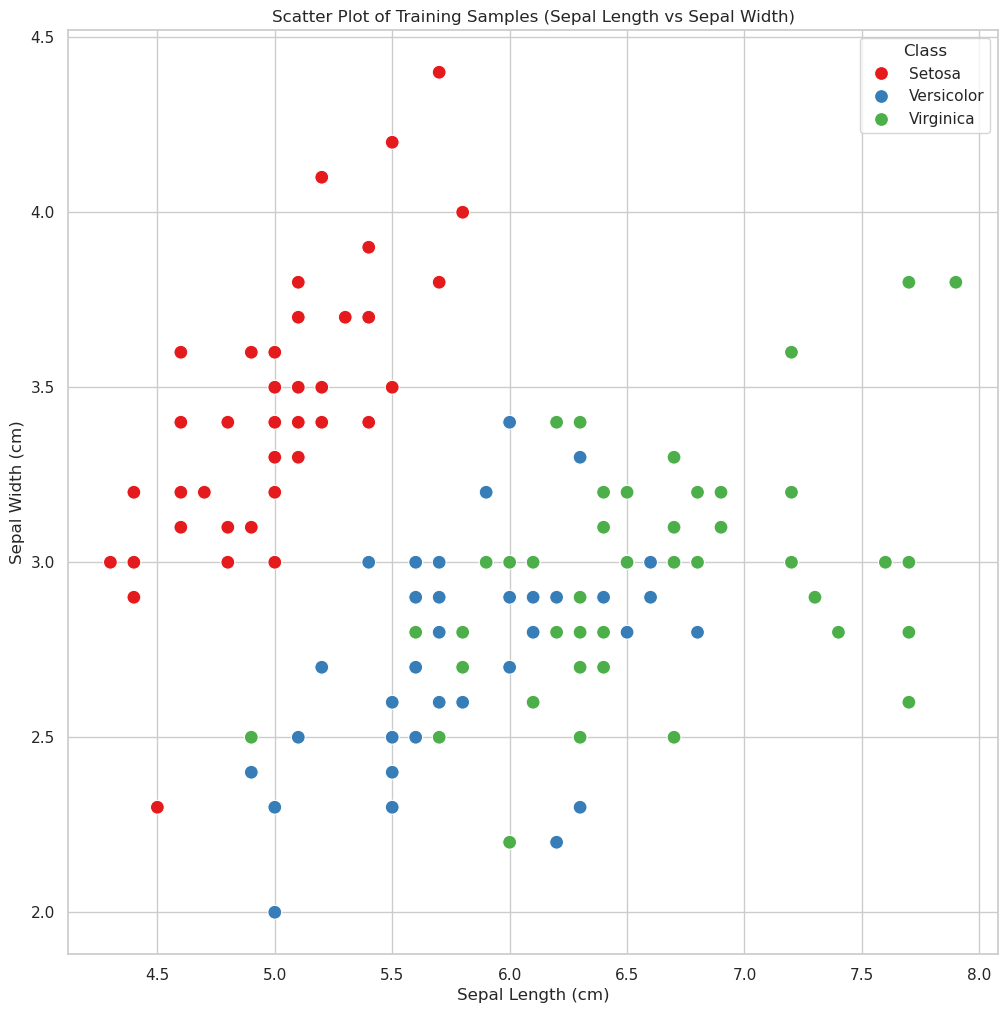

In [99]:
#Libraries used for scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

#Setting the style for the plot.
sns.set_theme(style = 'whitegrid')

#Creating a scatter plot for the training set.
plt.figure(figsize = (12, 12))

#Plotting sepal length vs sepal width.
sns.scatterplot(x = training_df['sepal.length'], y = training_df['sepal.width'], hue = training_df['variety'], palette = 'Set1',s = 100)

# Label for X-axis
plt.xlabel('Sepal Length (cm)')

# Label for Y-axis
plt.ylabel('Sepal Width (cm)')

#Title for plot.
plt.title('Scatter Plot of Training Samples (Sepal Length vs Sepal Width)')

#Legend for description of classes.
plt.legend(title='Class')

plt.show()

iii. For each sample in the testing set, compute its Euclidean distance to all samples in the training set. 

In [100]:
def euclidean_distance(test_f, train_f):
    
    #print("Testing features:\n", test_f)

    #Calculating distances.
    d = []

    for ts in test_f:
        dist = np.linalg.norm(train_f - ts, axis = 1)
        d.append(dist)

    distances = np.array(d)
    return distances

#Extract features except class label from training data and testing data.
train_f = training_df.iloc[:, : -1].values
test_f = test_df.iloc[:, : -1].values
train_labels = training_df.iloc[:, -1].values
#print(train_labels)
print("The Euclidean distances are:\n", euclidean_distance(test_f, train_f))


The Euclidean distances are:
 [[0.64031242 0.14142136 0.5        ... 1.48660687 1.1045361  0.94339811]
 [0.31622777 0.60827625 1.02956301 ... 1.6        1.36014705 1.        ]
 [0.14142136 0.5        0.98994949 ... 1.81107703 1.5132746  1.21655251]
 ...
 [1.71172428 1.33416641 1.08166538 ... 0.36055513 0.14142136 0.5       ]
 [1.26491106 1.20415946 1.26491106 ... 0.76157731 0.80622577 0.31622777]
 [2.5019992  2.18403297 1.92353841 ... 0.6        0.98488578 1.2       ]]


iv. Identify the K-nearest neighbors with the smallest Euclidean distances for each sample in the testing set, where K is a hyperparameter. 

In [101]:
# Function for identifying the K-nearest neighbours
def find_k_neighbours(test_f, train_f, K):
    k_neighbours = []

    for ts in test_f:
        
        #Calculate distances to all training samples
        d = np.linalg.norm(train_f - ts, axis = 1)

        #Get the K nearest indices
        k_nearest_i = d.argsort()[:K]

        # Retrive those labels
        k_labels = train_labels[k_nearest_i]

        #Append them
        k_neighbours.append(k_labels)
    
    return k_neighbours



In [102]:
# Define the hyperparameter K
K = 5

#Computing the K-nearest neighbours using the above function.
k_nearest_neighbours = find_k_neighbours(test_f, train_f, K)

for i, neighbours in enumerate(k_nearest_neighbours):
    print(f"Test sample {i + 1}: K  Nearest neighbours or Labels = {neighbours}")

Test sample 1: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 2: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 3: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 4: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica']
Test sample 5: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Versicolor' 'Virginica']
Test sample 6: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica']
Test sample 7: K  Nearest neighbours or Labels = ['Versicolor' 'Virginica' 'Virginica' 'Virginica' 'Virginica']
Test sample 8: K  Nearest neighbours or Labels = ['Versicolor' 'Virginica' 'Versicolor' 'Virginica' 'Versicolor']
Test sample 9: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica']


v. Determine the majority class among the K-nearest neighbors and assign it as the predicted class for the sample.


In [103]:
from collections import Counter

#Function to predict the class for the test dataset.
def predict_class(k_nearest_neighbours):
    predicted = []

    for n in k_nearest_neighbours:
        
        #Get counts of each class in the k-nearest neighbours.
        class_count = Counter(n)
        #print(class_count)
        
        #Determining majority class
        maj_class = class_count.most_common(1)[0][0]
        
        #Append the majority class to the output list
        predicted.append(maj_class)
    
    return predicted

In [104]:
#Displaying the predictions for the test dataset.
predicted_classes = predict_class(k_nearest_neighbours)
for i, predicted_class in enumerate(predicted_classes):
    print(f"Test sample {i + 1}: Predicted class = {predicted_class}")

Test sample 1: Predicted class = Setosa
Test sample 2: Predicted class = Setosa
Test sample 3: Predicted class = Setosa
Test sample 4: Predicted class = Virginica
Test sample 5: Predicted class = Virginica
Test sample 6: Predicted class = Virginica
Test sample 7: Predicted class = Virginica
Test sample 8: Predicted class = Versicolor
Test sample 9: Predicted class = Virginica


vi. Evaluate the accuracy of your classifier on the testing set and report the results.

In [105]:
#Function to caluculate accuracy.
def calculate_accuracy(test_df, predicted_classes):
    
    #Original class labels of the test dataset.
    true_labels = np.array(test_df.iloc[:,-1].values)
    
    #Class labels predicted by the algorithm.
    predicted_labels = np.array(predicted_classes)

    #Getting the count of correct labels.
    correct_predictions = np.sum(true_labels == predicted_labels)

    #Accuracy.
    accuracy = correct_predictions / len(true_labels)

    return accuracy


In [106]:
#Displaying the accuracy using the above function.

accuracy = calculate_accuracy(test_df, predicted_classes)
print(f"Accuracy of the model is {accuracy * 100:.2f}%")
#print(test_df.iloc[:,-1].values)

Accuracy of the model is 55.56%


vii. Classify using sklearn library knn-classifier and compare your result.

In [107]:
#Importing necessary libraries from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Training the classifier
knn_class = KNeighborsClassifier(n_neighbors=K)
#Fitting the model
knn_class.fit(train_f, train_labels)

#Predicting the classes for test labels.
sk_predicted_labels = knn_class.predict(test_f)

#Accuracy of the model.
sk_accuracy = accuracy_score(test_df.iloc[:, -1].values, sk_predicted_labels)

#Printing the accuracy
print(f"Accuracy of the KNN classifier using the sklearn libraries is {sk_accuracy * 100:.2f}%")
#Accuracy of the manual model.
print(f"Accuracy of the model without using sklearn library is {accuracy * 100:.2f}%")

Accuracy of the KNN classifier using the sklearn libraries is 55.56%
Accuracy of the model without using sklearn library is 55.56%


b. Repeat the same for all the four dimensions and skip plotting the data.

In [108]:
#Even for the four dimensions part of the question, I am using the same functions written manually without inbuilt libraries
#as we can pass the features and labels as a parameter to the functions above.

# test train split without inbuilt functions

#Testing data
testing_df = []

#First three samples of each variety are extracted.
for class_label in iris_df['variety'].unique():
    sample = iris_df[df['variety'] == class_label].head(3)
    testing_df.append(sample)

# The list is concatenated into a data-frame.
testing_df = pd.concat(testing_df)
print("Testing data:\n", testing_df)

#Remaining all samples are used for training as the test-train split ratio is not mentioned in the question.
train_df = iris_df.drop(testing_df.index) 
print("Training data:\n", train_df)

Testing data:
      sepal.length  sepal.width  petal.length  petal.width     variety
0             5.1          3.5           1.4          0.2      Setosa
1             4.9          3.0           1.4          0.2      Setosa
2             4.7          3.2           1.3          0.2      Setosa
50            7.0          3.2           4.7          1.4  Versicolor
51            6.4          3.2           4.5          1.5  Versicolor
52            6.9          3.1           4.9          1.5  Versicolor
100           6.3          3.3           6.0          2.5   Virginica
101           5.8          2.7           5.1          1.9   Virginica
102           7.1          3.0           5.9          2.1   Virginica
Training data:
      sepal.length  sepal.width  petal.length  petal.width    variety
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
5             5.4          3.9           1.7          0.4     

In [109]:
#Extract features except class label from training data and testing data.
training_features = train_df.iloc[:, : -1].values
testing_features = testing_df.iloc[:, : -1].values
training_labels = train_df.iloc[:, -1].values

#Getting the eucildean distance from the function that we created earlier.
dist = euclidean_distance(testing_features, training_features)
#print(train_labels)

print("The Euclidean distances are:\n", dist)


The Euclidean distances are:
 [[0.64807407 0.14142136 0.6164414  ... 4.45982062 4.65080638 4.14004831]
 [0.33166248 0.60827625 1.09087121 ... 4.49888875 4.71805044 4.15331193]
 [0.24494897 0.50990195 1.08627805 ... 4.66154481 4.84871117 4.29883705]
 ...
 [5.33572863 5.31319113 4.90611863 ... 1.00995049 0.64807407 1.24498996]
 [4.17731971 4.24617475 3.92555729 ... 0.77459667 0.9486833  0.33166248]
 [5.4064776  5.35070089 4.92239779 ... 0.92736185 1.12249722 1.47309199]]


In [110]:
# Define the hyperparameter K
K = 5

#Computing the K-nearest neighbours using the above function.
k_nearest_Neighbours = find_k_neighbours(testing_features, training_features, K)

for i, neighbours in enumerate(k_nearest_Neighbours):
    print(f"Test sample {i + 1}: K  Nearest neighbours or Labels = {neighbours}")

Test sample 1: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 2: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 3: K  Nearest neighbours or Labels = ['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa']
Test sample 4: K  Nearest neighbours or Labels = ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor']
Test sample 5: K  Nearest neighbours or Labels = ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor']
Test sample 6: K  Nearest neighbours or Labels = ['Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor']
Test sample 7: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica']
Test sample 8: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Versicolor']
Test sample 9: K  Nearest neighbours or Labels = ['Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica']


In [111]:
#Displaying the predictions for the test dataset.
predicted_Classes = predict_class(k_nearest_Neighbours)
for i, predicted_class in enumerate(predicted_Classes):
    print(f"Test sample {i + 1}: Predicted class = {predicted_class}")

Test sample 1: Predicted class = Setosa
Test sample 2: Predicted class = Setosa
Test sample 3: Predicted class = Setosa
Test sample 4: Predicted class = Versicolor
Test sample 5: Predicted class = Versicolor
Test sample 6: Predicted class = Versicolor
Test sample 7: Predicted class = Virginica
Test sample 8: Predicted class = Virginica
Test sample 9: Predicted class = Virginica


In [112]:
#Computing accuracy
accuracy_more = calculate_accuracy(testing_df, predicted_Classes)
print(f"Accuracy of the model is {accuracy_more * 100:.2f}%")
#print(test_df.iloc[:,-1].values)

Accuracy of the model is 100.00%


In [113]:
#Creating the model using sklearn

#Importing necessary libraries from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Training the classifier
knn_Class = KNeighborsClassifier(n_neighbors=K)
#Fitting the model
knn_Class.fit(training_features, training_labels)

#Predicting the classes for test labels.
sk_predicted_Labels = knn_Class.predict(testing_features)

#Accuracy of the model.
sk_Accuracy = accuracy_score(testing_df.iloc[:, -1].values, sk_predicted_Labels)

#Printing the accuracy
print(f"Accuracy of the KNN classifier using the sklearn libraries is {sk_Accuracy * 100:.2f}%")
#Accuracy of the manual model.
print(f"Accuracy of the model without using sklearn library is {accuracy_more * 100:.2f}%")

Accuracy of the KNN classifier using the sklearn libraries is 100.00%
Accuracy of the model without using sklearn library is 100.00%
